# E05_Rock_Scissor_Paper

## Load library

In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import os, glob
import matplotlib.pyplot as plt

## Load data, Resize Rock, Scissor, paper

In [51]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_/scissor"
resize_images(image_dir_path)

650  images to be resized.
650  images resized.


In [52]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_/paper"
resize_images(image_dir_path)

630  images to be resized.
630  images resized.


## Make train set and test set

In [60]:
def load_data(img_path, number_of_data=2000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1910 입니다.
x_train shape: (2000, 28, 28, 3)
y_train shape: (2000,)


라벨:  0


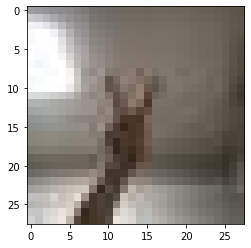

In [61]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [64]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def load_data(ima_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1173 # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(ima_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(ima_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(ima_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

test_dir = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(test_dir)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (1173, 28, 28, 3)
y_test shape: (1173,)


## Make deep learing network

In [65]:
n_channel_1=32
n_channel_2=64
n_channel_3 = 128
n_dense=512

IMG_HEIGHT = 28
IMG_WIDTH = 28

In [66]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

## Evaluate model by test set

In [67]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', 
                              input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])



callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(x_train_reshaped, y_train, batch_size=100,epochs=30, 
                    verbose=1, validation_data=(x_test_reshaped, y_test),
                    callbacks =[callback])


test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 128)        

## 최종적으론 test_loss: 1.2142486572265625 test_accuracy: 0.8294970393180847
## test_accuracy가 82.94 % 나왔다.


----------------------------------------------------------------------------------------------------------------------

# 회고

첫 시도에는 아이펠 폴더에 있는 기존 데이터로 해보았지만, 정확도가 상당히 낮게 나왔고 볼품 없었다. 

결국 데이터 수가 문제라고 생각을 해서 직접 웹캠으로 총 1910장의 데이터를 수집했다. 최대한 다양한 각도에서 많이 찍은 데이터였다. 

또한, train, test set에서 총 이미지 수를 제대로 기입하지 않아 index 에러가 났었다.

딥러닝 모델 설계에서 여러 시도 끝에, 사진에서 가위, 바위, 보 살펴야 할 특징이 많을 것이라고 생각해서 layer를 추가해보았다. 그리고 서치 후에 Dropout, keras 를 사용해서 과적합을 줄이도록 했다. 

그 결과 약 83%의 정확도가 나왔다. 데이터는 많을 수록 좋고, 과적합은 적절히 줄여야 좋은 모델이 완성이 되는 것 같다.